In [1]:
# Code calculates month-wise mean of R0 from 2007 to 2023
# plots each month with consecutive month overlayed on the previous month
# import packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm, ListedColormap
import geopandas as gpd

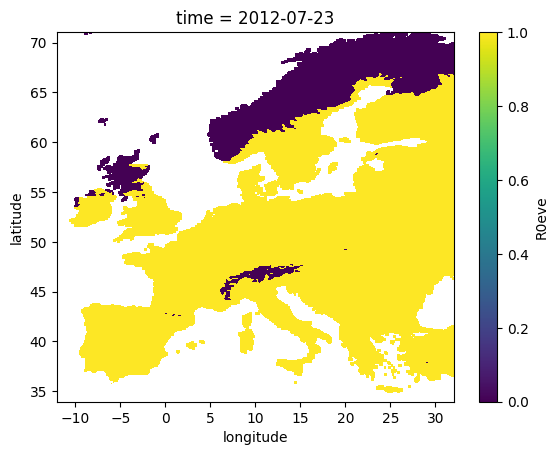

In [2]:
# load data file
ds = xr.open_dataset('chikv_europe_event.nc')

# check data
ds['R0eve'].isel(time=2030).plot()

In [3]:
# computing seasonal mean over 2007-2023
ds_season = ds.groupby("time.season").mean(dim="time")
ds_season_vals = ds_season['R0eve'].values

# convert seasonal probabilities to event:  1 for P(R0 > 1) > 0.95 and 0 for ~ (P(R0 > 1) > 0.95)
seasonal_event = np.where(~np.isnan(ds_season_vals), np.where(ds_season_vals > 0.95, 1, 0), np.nan)

# write dataset
# setting dimensions and coordinates of the dataset
dims = ['season', 'latitude', 'longitude']
coords = {
    'season': ds_season['season'].values,
    'latitude': ds_season['latitude'].values,
    'longitude': ds_season['longitude'].values
}
da_season_event = xr.DataArray(data=seasonal_event, dims=dims, coords=coords)

# get the dataset
ds_season_event = xr.Dataset({'R0eve': da_season_event})

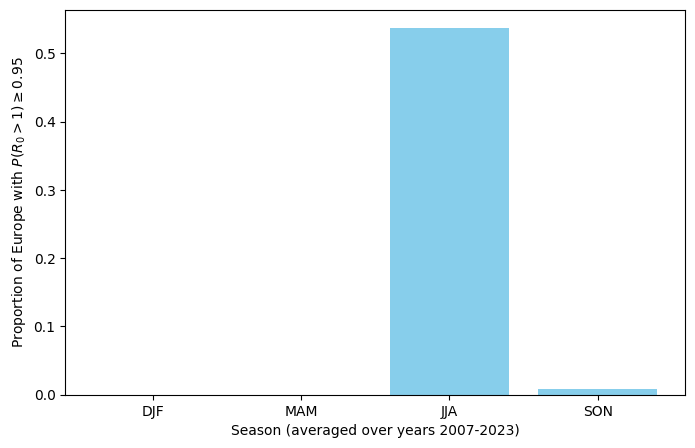

In [5]:
# seasonal chart (chart shows the seasonal mean of the event (P(R0 > 1) >= 0.95) > 0 for whole of the Europe)
# europe mean
ds_season_europe = ds_season_event.mean(dim=['latitude', 'longitude'])

xx = ['DJF', 'MAM', 'JJA', 'SON']
yy = [ds_season_europe['R0eve'].values[0], ds_season_europe['R0eve'].values[2],
      ds_season_europe['R0eve'].values[1], ds_season_europe['R0eve'].values[3]]

# plot
plt.figure(figsize=(8, 5))
plt.bar(xx, yy, color='skyblue')
plt.xlabel('Season (averaged over years 2007-2023)')
plt.ylabel(r'Proportion of Europe with $P(R_{0} > 1) \geq 0.95$')
plt.savefig('plots/europe_proportion_seasonal_risk_chart.png')
plt.show()

In [6]:
# computing monthly mean over 2007-2023
ds_month = ds.groupby("time.month").mean(dim="time")
ds_month_vals = ds_month['R0eve'].values

# convert monthly probabilities to event:  1 for P(R0 > 1) > 0.95 and 0 for ~ (P(R0 > 1) > 0.95)
monthly_event = np.where(~np.isnan(ds_month_vals), np.where(ds_month_vals > 0.95, 1, 0), np.nan)

# write dataset
# setting dimensions and coordinates of the dataset
dims = ['month', 'latitude', 'longitude']
coords = {
    'month': ds_month['month'].values,
    'latitude': ds_month['latitude'].values,
    'longitude': ds_month['longitude'].values
}
da_month_event = xr.DataArray(data=monthly_event, dims=dims, coords=coords)

# get the dataset
ds_month_event = xr.Dataset({'R0eve': da_month_event})

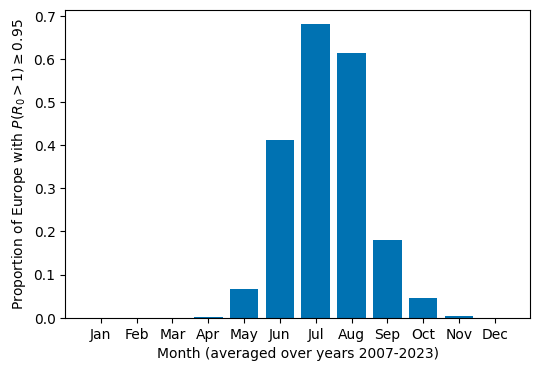

In [37]:
# monthly chart (chart shows the monthly mean of the event (P(R0 > 1) >= 0.95) > 0 for whole of the Europe)
# europe mean
ds_month_europe = ds_month_event.mean(dim=['latitude', 'longitude'])
xx = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yy = [ds_month_europe['R0eve'].values[0], ds_month_europe['R0eve'].values[1], ds_month_europe['R0eve'].values[2],
      ds_month_europe['R0eve'].values[3], ds_month_europe['R0eve'].values[4], ds_month_europe['R0eve'].values[5],
      ds_month_europe['R0eve'].values[6], ds_month_europe['R0eve'].values[7], ds_month_europe['R0eve'].values[8],
      ds_month_europe['R0eve'].values[9], ds_month_europe['R0eve'].values[10], ds_month_europe['R0eve'].values[11]]

# plot
plt.figure(figsize=(6, 4))
plt.bar(xx, yy, color='#0072B2')
#plt.title('Months avergaed over years 2007-2023')
plt.xlabel('Month (averaged over years 2007-2023)')
plt.ylabel(r'Proportion of Europe with $P(R_{0} > 1) \geq 0.95$')
plt.savefig('plots/europe_proportion_monthly_risk_chart.eps', dpi=600)
plt.show()

In [7]:
# computing annual mean over 2007-2023
ds_annual = ds.groupby("time.year").mean(dim="time")
ds_annual_vals = ds_annual['R0eve'].values

# convert monthly probabilities to event:  1 for P(R0 > 1) > 0.95 and 0 for ~ (P(R0 > 1) > 0.95)
annual_event = np.where(~np.isnan(ds_annual_vals), np.where(ds_annual_vals > 0.8, 1, 0), np.nan)

# write dataset
# setting dimensions and coordinates of the dataset
dims = ['year', 'latitude', 'longitude']
coords = {
    'year': ds_annual['year'].values,
    'latitude': ds_annual['latitude'].values,
    'longitude': ds_annual['longitude'].values
}
da_annual_event = xr.DataArray(data=annual_event, dims=dims, coords=coords)

# get the dataset
ds_annual_event = xr.Dataset({'R0eve': da_annual_event})

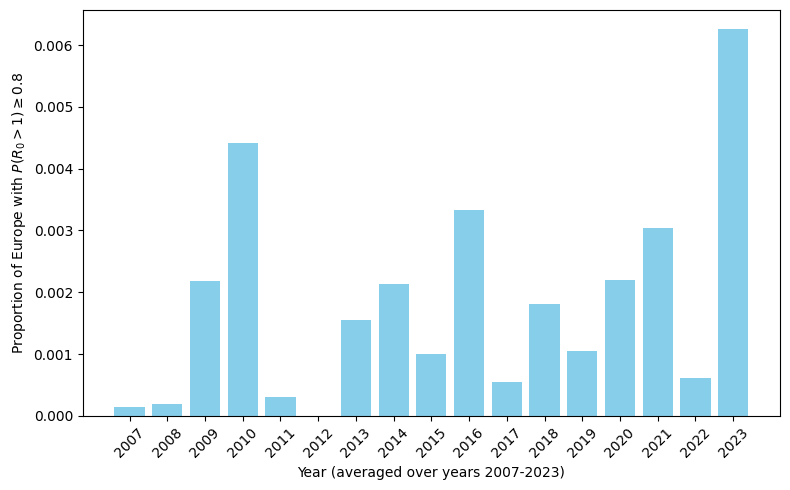

In [8]:
# annual chart (chart shows the annual mean of the event (P(R0 > 1) >= 0.95) > 0 for whole of the Europe)
# europe mean
ds_annual_europe = ds_annual_event.mean(dim=['latitude', 'longitude'])
xx = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
      '2017', '2018', '2019', '2020', '2021', '2022', '2023']
yy = [ds_annual_europe['R0eve'].values[0], ds_annual_europe['R0eve'].values[1], ds_annual_europe['R0eve'].values[2],
      ds_annual_europe['R0eve'].values[3], ds_annual_europe['R0eve'].values[4], ds_annual_europe['R0eve'].values[5],
      ds_annual_europe['R0eve'].values[6], ds_annual_europe['R0eve'].values[7], ds_annual_europe['R0eve'].values[8],
      ds_annual_europe['R0eve'].values[9], ds_annual_europe['R0eve'].values[10], ds_annual_europe['R0eve'].values[11],
      ds_annual_europe['R0eve'].values[12], ds_annual_europe['R0eve'].values[13], ds_annual_europe['R0eve'].values[14],
      ds_annual_europe['R0eve'].values[15], ds_annual_europe['R0eve'].values[16]]

# plot
plt.figure(figsize=(8, 5))
plt.bar(xx, yy, color='skyblue')
plt.ylabel('log')
plt.xticks(rotation=45)
#plt.title('Months avergaed over years 2007-2023')
plt.xlabel('Year (averaged over years 2007-2023)')
plt.ylabel(r'Proportion of Europe with $P(R_{0} > 1) \geq 0.8$')
plt.tight_layout()
plt.savefig('plots/europe_proportion_yearly_risk_chart.png', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
# Adding shape boundaries using Eurostat NUTS level 0 and level 3 boundaries
# use package geopandas
# the nuts shape file
path_sf = "sf_nuts_2021/NUTS_RG_03M_2021_4326.shp"
sf_2021 = gpd.read_file(path_sf, encoding='latin1')
sf_lvl_0 = sf_2021[sf_2021['LEVL_CODE'] == 0] # level 0
sf_lvl_3 = sf_2021[sf_2021['LEVL_CODE'] == 3] # level 3

# check the CRS (EPSG: 4326): level 0
if sf_lvl_0.crs != "EPSG:4326":
    sf_lvl_0 = sf_lvl_0.to_crs("EPSG: 4326")

# check the CRS (EPSG: 4326): level 3
if sf_lvl_3.crs != "EPSG:4326":
    sf_lvl_3 = sf_lvl_3.to_crs("EPSG: 4326")

# ensure that netcdf has correct crs
if not ds_season_event.rio.crs:
    ds_season_event = ds_season_event.rio.write_crs("EPSG: 4326")

# clip the shape file boundaries: level 0
sf_clipped_0 = ds_season_event.rio.clip(sf_lvl_0.geometry, all_touched=True, drop=True)

# clip the shape file boundaries: level 3
sf_clipped_3 = ds_season_event.rio.clip(sf_lvl_3.geometry, all_touched=True, drop=True)

In [10]:
# seasonal overlay plot
# extracting seasons
ds_season_event_djf = ds_season_event['R0eve'].isel(season=0)
ds_season_event_mam = ds_season_event['R0eve'].isel(season=2)
ds_season_event_jja = ds_season_event['R0eve'].isel(season=1)
ds_season_event_son = ds_season_event['R0eve'].isel(season=3)

In [15]:
ds_annual_event

<xarray.Dataset> Size: 22MB
Dimensions:    (year: 17, latitude: 372, longitude: 442)
Coordinates:
  * year       (year) int64 136B 2007 2008 2009 2010 ... 2020 2021 2022 2023
  * latitude   (latitude) float32 1kB 71.0 70.9 70.8 70.7 ... 34.2 34.1 34.0
  * longitude  (longitude) float32 2kB -12.0 -11.9 -11.8 ... 31.8 31.9 32.0
Data variables:
    R0eve      (year, latitude, longitude) float64 22MB nan nan nan ... nan nan